# DSC350 - Week 9 - Exercise 9.2

*The original exercises for the week, as noted in the text, specifically call for using the using the "stock_analysis" library; however, further investigation into the documentation for this library notes that it is no longer available and suggests using the "yfinance" module instead. Additionally, CSV files containing the data were also used to complete some of the analysis (BTC and S&P 500) as it was not available in the yfinance library.*

We begin the exercises this week by importing the necessary libraries and files.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

file_names = {
    "AMZN": (r'C:\Users\thefli0\Downloads\amazon.csv'),
    "AAPL": (r'C:\Users\thefli0\Downloads\apple.csv'),
    "FB": (r'C:\Users\thefli0\Downloads\facebook.csv'),
    "GOOG": (r'C:\Users\thefli0\Downloads\google.csv'),
    "NFLX": (r'C:\Users\thefli0\Downloads\netflix.csv')
}

## Hands-On Data Analysis with Python (2nd Edition): Page 475, Exercise 1-5

**1. Using the "StockAnalyzer" and "StockVisualizer" classes, calculate and plot three levels of support and resistance for Netflix's closing price.**

[*********************100%%**********************]  1 of 1 completed


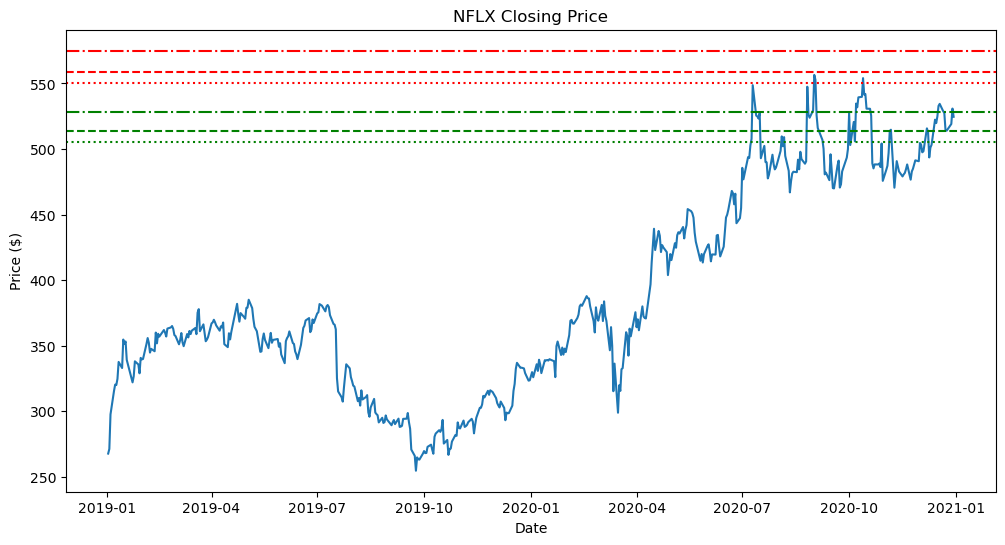

In [2]:
# Define StockAnalyzer class
class StockAnalyzer:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.data = yf.download(ticker, start=start, end=end)

    # Define support and resistance levels
    def calculate_support_resistance(self):
        support_levels = [505, 514, 528]
        resistance_levels = [550, 559, 575]
        return support_levels, resistance_levels

# Define StockVisualizer class
class StockVisualizer:
    def __init__(self, data):
        self.data = data

    # Define labels, styles, and configuration for plot
    def plot(self, support_levels, resistance_levels):
        plt.figure(figsize=(12, 6))
        plt.plot(self.data.index, self.data['Close'], label='NFLX Closing Price')
        linestyles = [':', '--', '-.']
        for i, level in enumerate(support_levels):
            plt.axhline(y=level, color='green', linestyle=linestyles[i], label=f'Support Level {i+1}')
        for i, level in enumerate(resistance_levels):
            plt.axhline(y=level, color='red', linestyle=linestyles[i], label=f'Resistance Level {i+1}')
        plt.title('NFLX Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend('', frameon=False)
        plt.show()

# Specify parameters
ticker = 'NFLX'
start_date = '2019-01-01'
end_date = '2020-12-31'
analyzer = StockAnalyzer(ticker, start_date, end_date)
support_levels, resistance_levels = analyzer.calculate_support_resistance()

visualizer = StockVisualizer(analyzer.data)
visualizer.plot(support_levels, resistance_levels)

**2. With the "StockVisualizer" class, look at the effect of after-hours trading on the FAANG stocks:**
 - a) As individual stocks
 - b) As a portfolio using the *make_portolio()* function from the *stock_analysis.utils* module

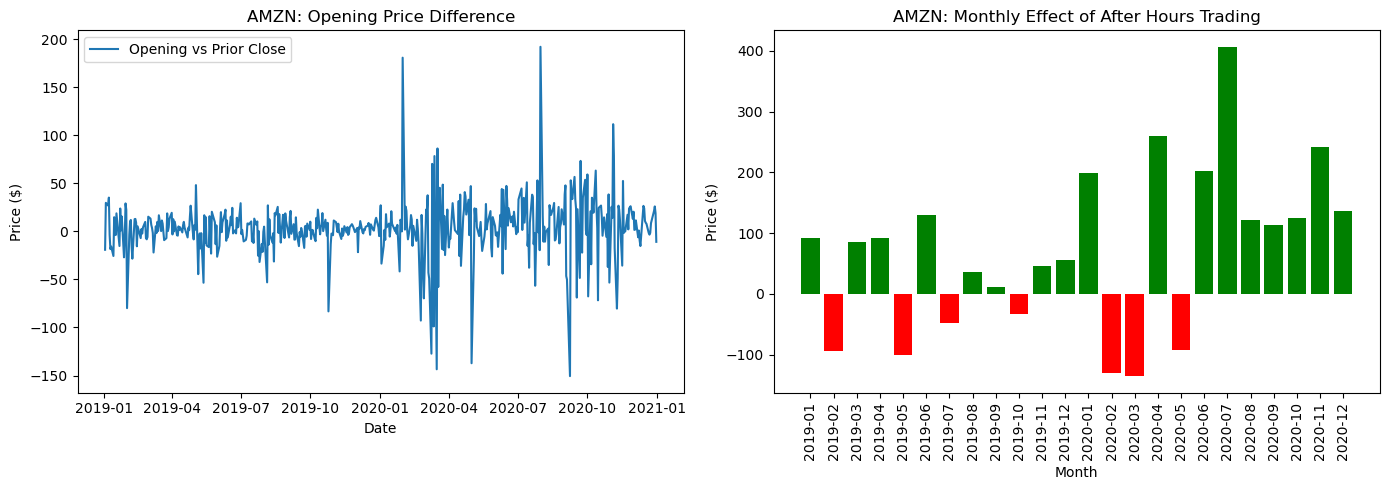

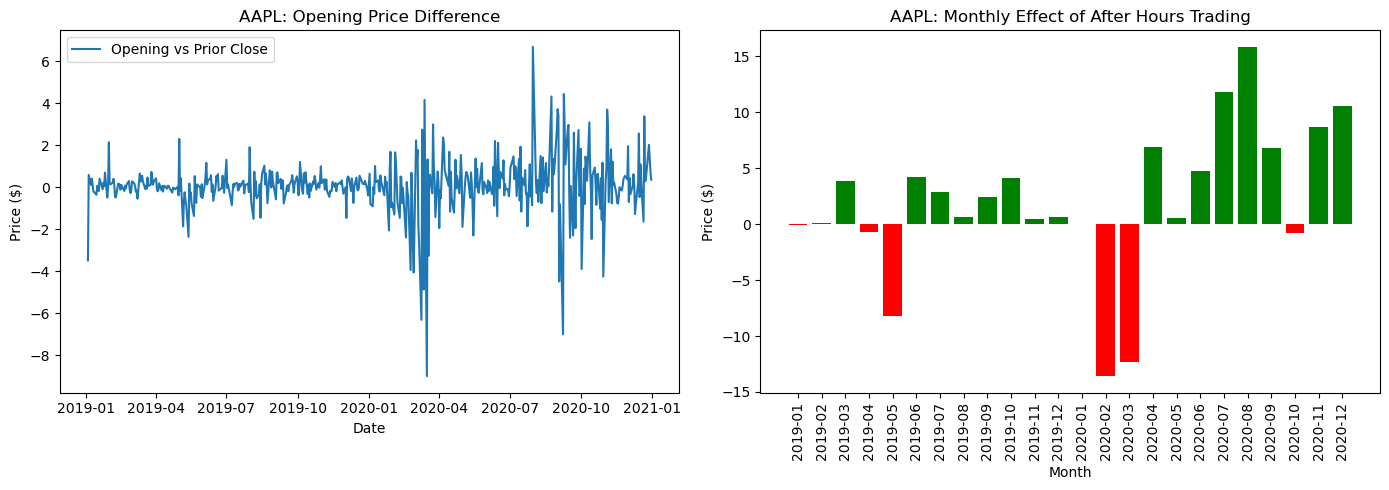

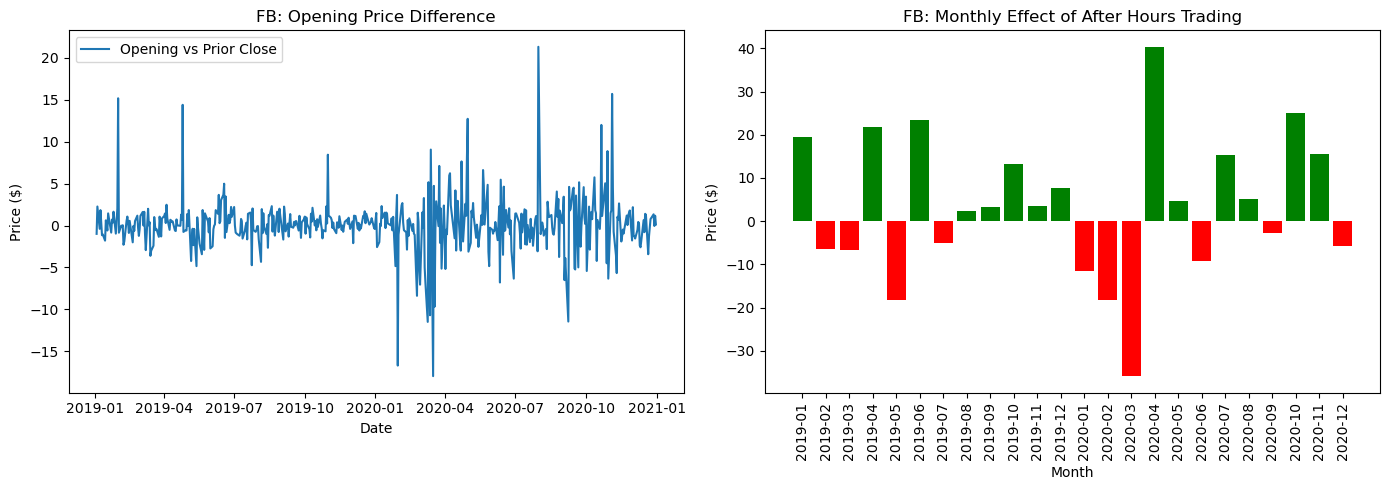

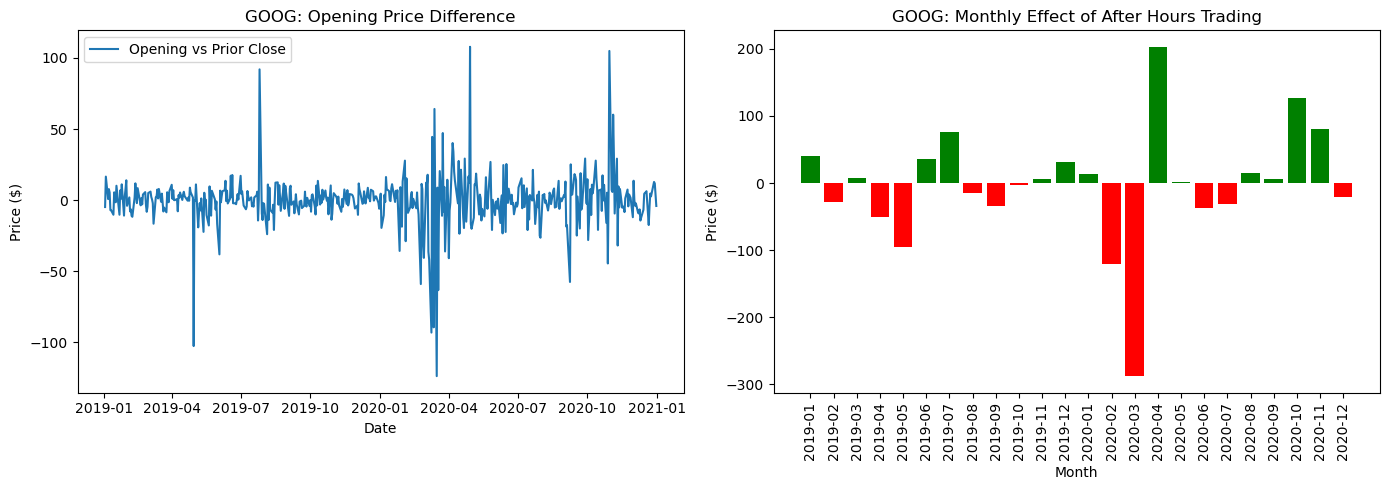

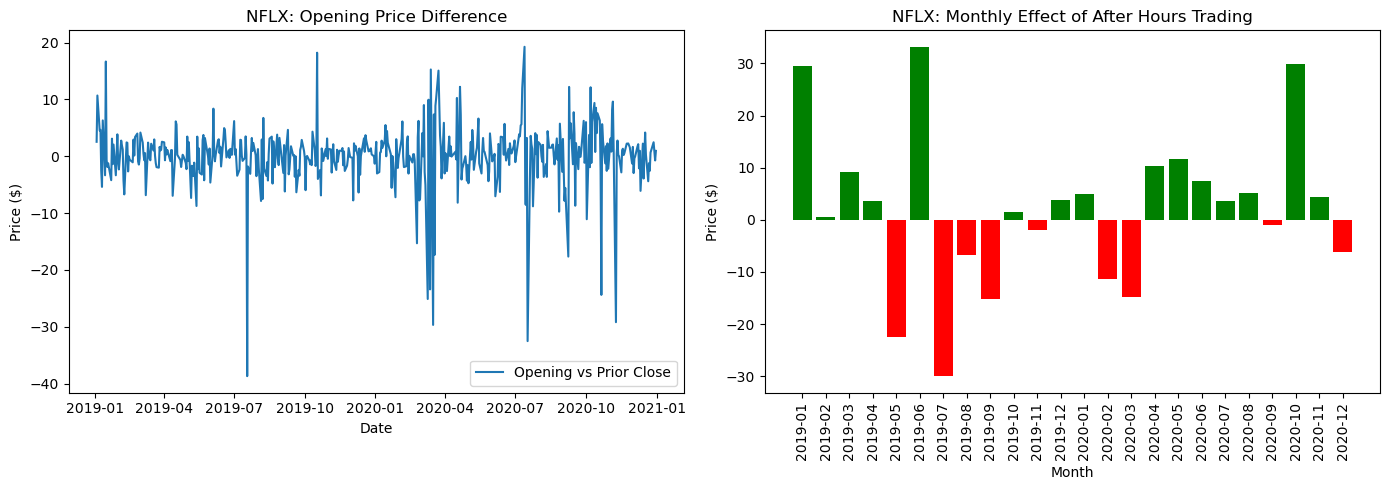

In [3]:
# Read CSV file into dataframe
data_frames = {company: 
               pd.read_csv(file, parse_dates=['date']) for company, file in file_names.items()}

# Create StockVisualizer class
class StockVisualizer:
    def __init__(self, data_frames):
        self.data_frames = data_frames

    # Define subplots for open_vs_prior_close
    def plot_open_vs_prior_close(self):
        for company, df in self.data_frames.items():
            df['prior_close'] = df['close'].shift(1)
            df['opening_diff'] = df['open'] - df['prior_close']
            plt.figure(figsize=(14, 5))
            plt.subplot(1, 2, 1)
            plt.plot(df['date'], df['opening_diff'], label='Opening vs Prior Close')
            plt.title(f'{company}: Opening Price Difference')
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.legend()

            # Prepare data for monthly effect plot
            df['month'] = df['date'].dt.to_period('M')
            monthly_effect = df.groupby('month')['opening_diff'].sum().reset_index()
            monthly_effect['color'] = np.where(monthly_effect['opening_diff'] >=0, 'g', 'r')

            # Define subplot for Monthly effect of after hours trading
            plt.subplot(1, 2, 2)
            plt.bar(monthly_effect['month'].astype(str), monthly_effect['opening_diff'], color=monthly_effect['color'])
            plt.title(f'{company}: Monthly Effect of After Hours Trading')
            plt.xlabel('Month')
            plt.ylabel('Price ($)')
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()

# Example usage
if __name__ == "__main__":
    visualizer = StockVisualizer(data_frames)

# Display results
visualizer.plot_open_vs_prior_close()

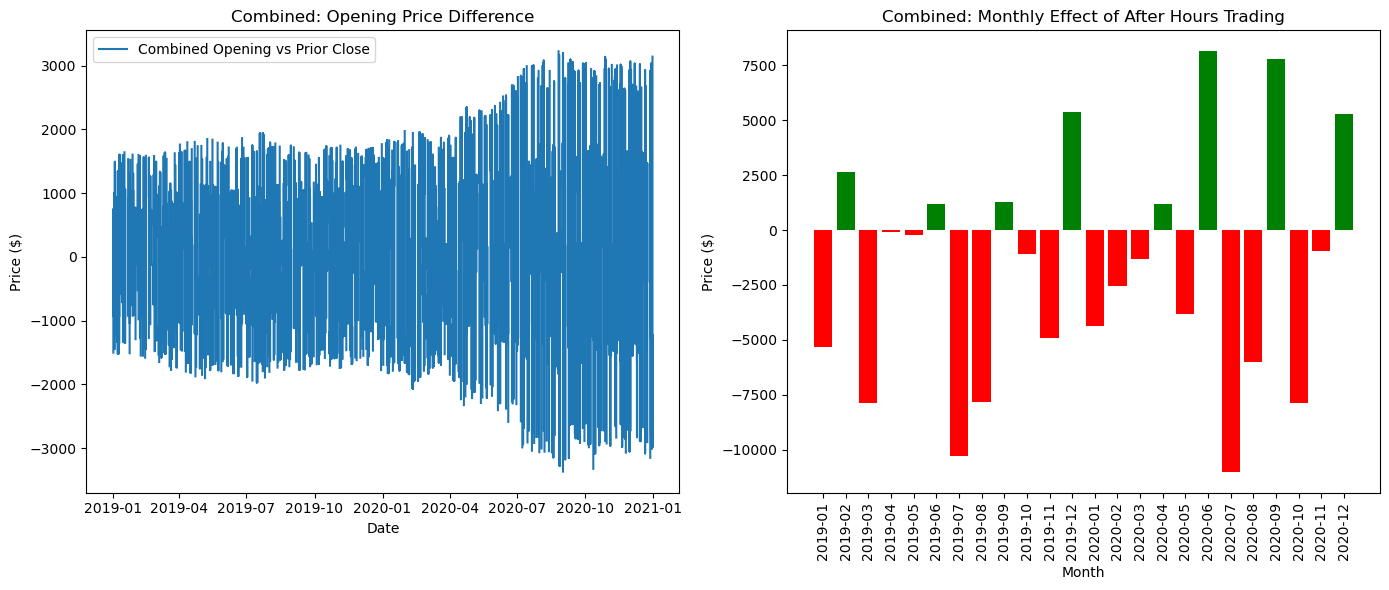

In [4]:
# Read CSV file into dataframe
data_frames = {company: 
               pd.read_csv(file, parse_dates=['date']) for company, file in file_names.items()}

# Create StockVisualizer class
class StockVisualizer:
    def __init__(self, data_frames):
        self.data_frames = data_frames

    # Define plot to combine all open_vs_prior_close
    def plot_combined_open_vs_prior_close(self):
        combined_df = pd.concat(self.data_frames.values()).sort_values(by='date')
        combined_df['prior_close'] = combined_df.groupby(combined_df['date'].dt.date)['close'].shift(1)
        combined_df['opening_diff'] = combined_df['open'] - combined_df['prior_close']

        plt.figure(figsize=(14, 6))
        plt.subplot(1, 2, 1)
        plt.plot(combined_df['date'], combined_df['opening_diff'], label='Combined Opening vs Prior Close')
        plt.title('Combined: Opening Price Difference')
        plt.xlabel('Date')
        plt.ylabel('Price ($)')
        plt.legend()

        # Prepare data for combined monthly effect plot
        combined_df['month'] = combined_df['date'].dt.to_period('M')
        monthly_effect = combined_df.groupby('month')['opening_diff'].sum().reset_index()
        monthly_effect['color'] = np.where(monthly_effect['opening_diff'] >= 0, 'g', 'r')

        # Create plot for monthly effect of after hours trading
        plt.subplot(1, 2, 2)
        plt.bar(monthly_effect['month'].astype(str), monthly_effect['opening_diff'], color=monthly_effect['color'])
        plt.title('Combined: Monthly Effect of After Hours Trading')
        plt.xlabel('Month')
        plt.ylabel('Price ($)')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

# Example
if __name__ == "__main__":
    visualizer = StockVisualizer(data_frames)

# Display results
visualizer.plot_combined_open_vs_prior_close()

**3. Using the "StockVisualizer.open_to_close()" method, create a plot that fills the area between the FAANG stocks' opening price (as a portfolio) and its closing price each day in red if the price declined and in green if the price increased. As a bonus, do the same for a portfolio of bitcoin and the S&P 500.**

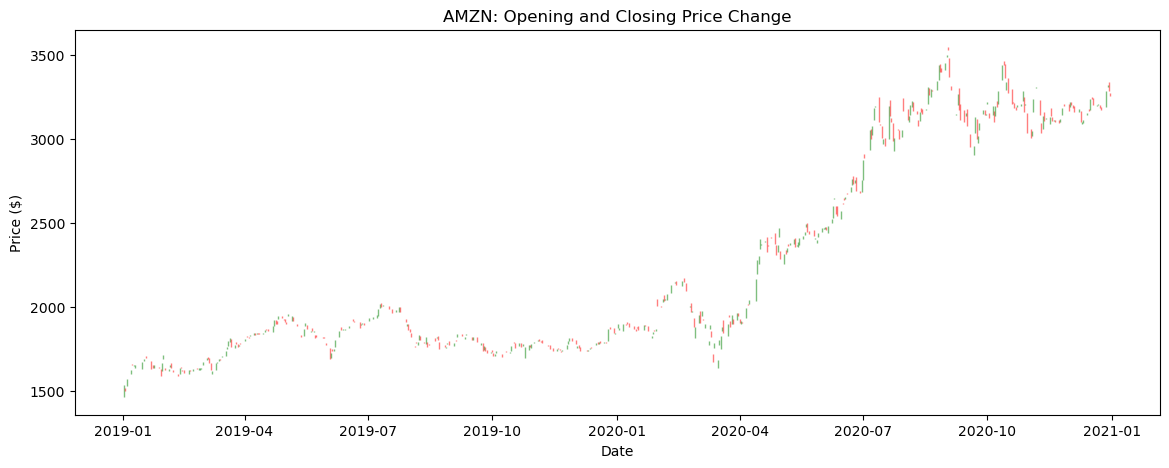

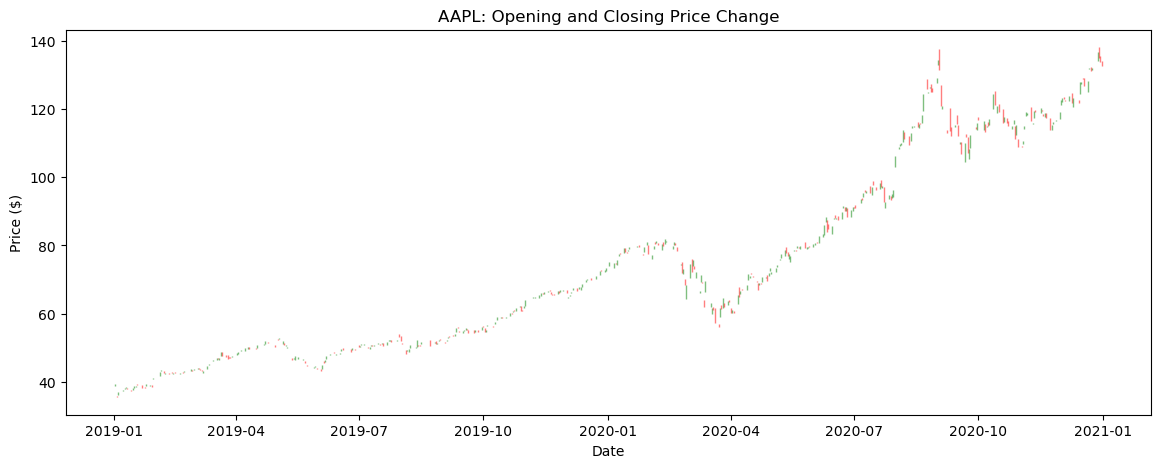

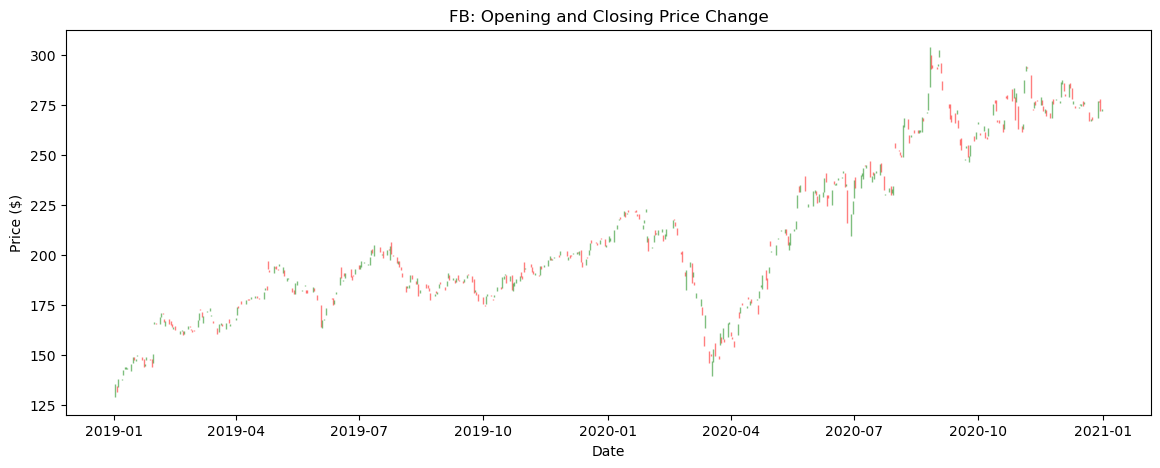

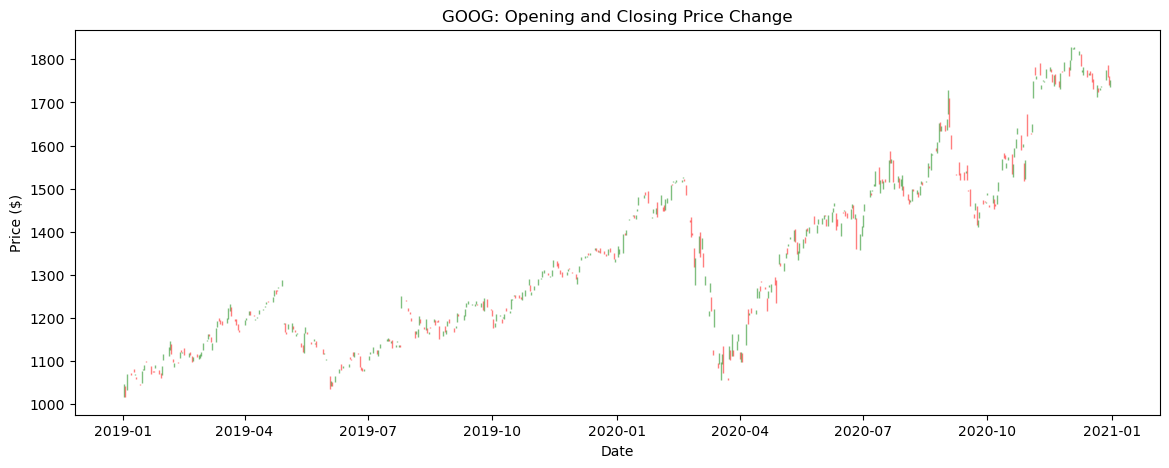

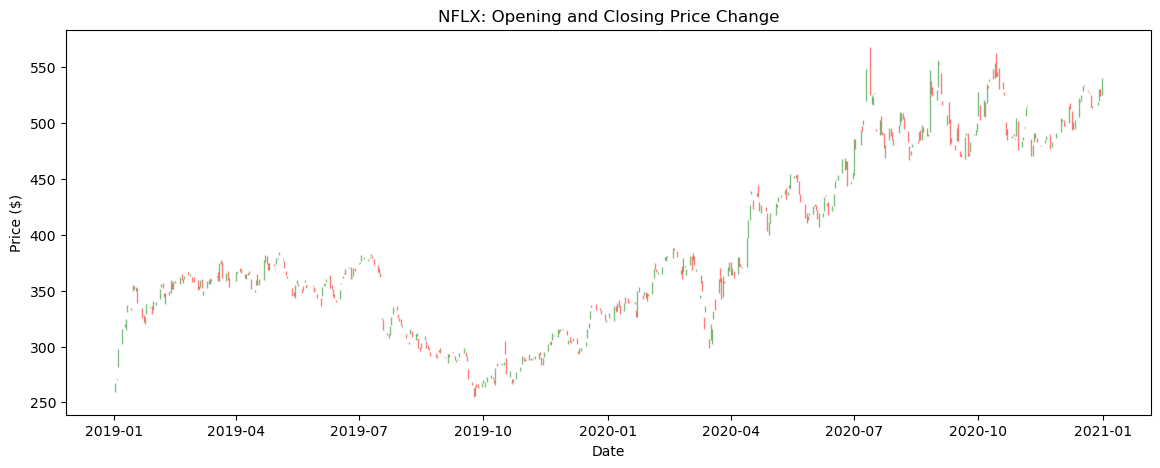

In [5]:
# Read CSV file into dataframe
data_frames = {company: 
               pd.read_csv(file, parse_dates=['date']) for company, file in file_names.items()}

# Create StockVisualizer class
class StockVisualizer:
    def __init__(self, data_frames):
        self.data_frames = data_frames

    # Create plot to fill area between open/close
    def plot_fill_between_open_and_close(self):
        for company, df in self.data_frames.items():
            plt.figure(figsize=(14, 5))
            for i in range(len(df)):
                if df.loc[i, 'close'] >= df.loc[i, 'open']:
                    plt.fill_between([df.loc[i, 'date'], df.loc[i, 'date']], df.loc[i, 'open'], df.loc[i, 'close'], color='green', alpha=0.5)
                else:
                    plt.fill_between([df.loc[i, 'date'], df.loc[i, 'date']], df.loc[i, 'open'], df.loc[i, 'close'], color='red', alpha=0.5)
            plt.title(f'{company}: Opening and Closing Price Change')
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.show()

# Example usage
if __name__ == "__main__":
    visualizer = StockVisualizer(data_frames)

# Display results
visualizer.plot_fill_between_open_and_close()

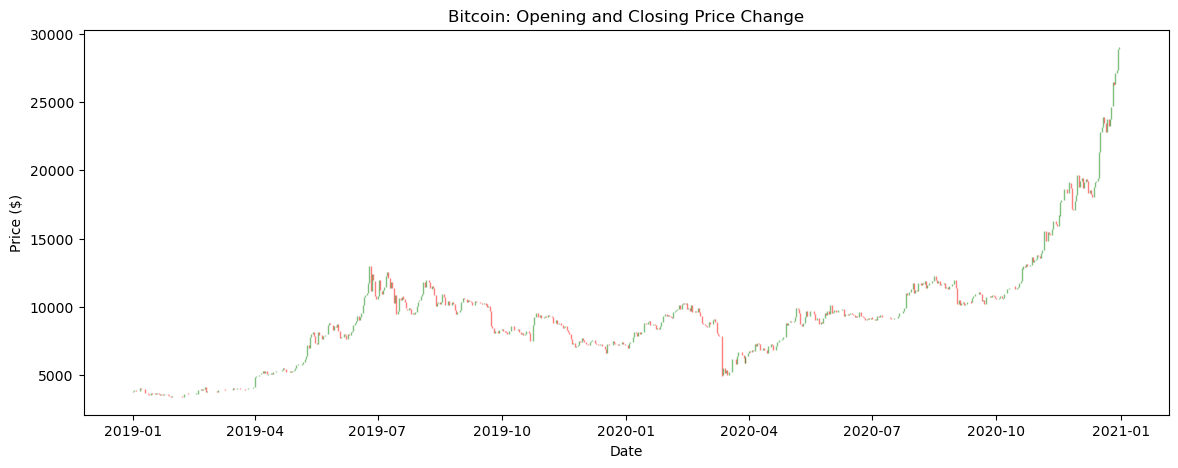

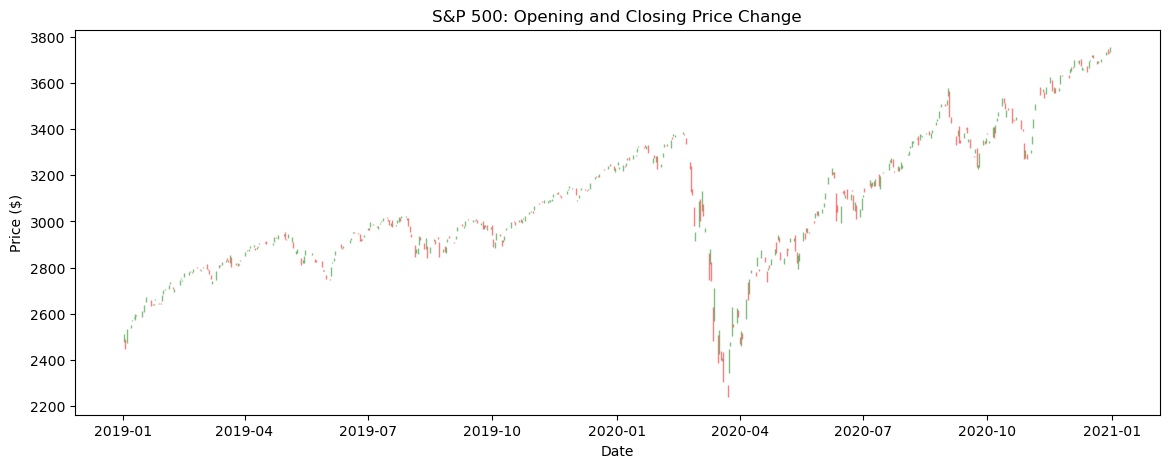

In [6]:
# Read CSV file into DataFrame
data_frames = {company: 
               pd.read_csv(file, parse_dates=['date']) for company, file in file_names.items()}

# Create StockVisualizer class
class StockVisualizer:
    def __init__(self, data_frames):
        self.data_frames = data_frames

    # Create plot to fill area between open and close for both Bitcoin and S&P 500
    def plot_fill_between_open_and_close_bitcoin_sp500(self):
        for file, name in zip([(r"C:\Users\thefli0\Downloads\bitcoin.csv"), (r"C:\Users\thefli0\Downloads\sp500.csv")], ["Bitcoin", "S&P 500"]):
            df = pd.read_csv(file, parse_dates=['date'])
            plt.figure(figsize=(14, 5))
            for i in range(len(df)):
                if df.loc[i, 'close'] >= df.loc[i, 'open']:
                    plt.fill_between([df.loc[i, 'date'], df.loc[i, 'date']], df.loc[i, 'open'], df.loc[i, 'close'], color='green', alpha=0.5)
                else:
                    plt.fill_between([df.loc[i, 'date'], df.loc[i, 'date']], df.loc[i, 'open'], df.loc[i, 'close'], color='red', alpha=0.5)
            plt.title(f'{name}: Opening and Closing Price Change')
            plt.xlabel('Date')
            plt.ylabel('Price ($)')
            plt.show()

# Example
if __name__ == "__main__":
    visualizer = StockVisualizer(data_frames)

# Display results
visualizer.plot_fill_between_open_and_close_bitcoin_sp500()

**4. Mutual funds and exchange-traded funds (ETFs) are funds that are composed of many assets. They are built to mitigate risk, so volatility for the fund will be lower than that of the assets that compose it. (Information on how they differ can be found at https://www.investopedia.com/articles/exchangetradedfunds/08/etf-mutual-fund-difference.asp.) Compare a mutual fund or ETF of your choice to three of its largest stocks (by composition) using annualized volatility and the "AssetGroupAnalyzer" class.**

In [7]:
# Define the mutual fund and its top 3 assets
mutual_fund = "FBALX"
top_assets = ["AAPL", "MSFT", "GOOGL"]

# Define period for analysis
start_date = "2018-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Function to calculate annualized volatility
def annualized_volatility(data):
    return data.pct_change().std() * np.sqrt(252)

# Fetch data from yfinance
def fetch_data(ticker, start, end):
    return yf.download(ticker, start=start, end=end)["Adj Close"]

# Fetch mutual fund data
mutual_fund_data = fetch_data(mutual_fund, start_date, end_date)

# Fetch top asset data
assets_data = {asset:
              fetch_data(asset, start_date, end_date) for asset in top_assets
              }

# Calculate annualized volatility
volatility = {mutual_fund:
             annualized_volatility(mutual_fund_data)}
volatility.update({asset:
                   annualized_volatility(data) for asset, data in assets_data.items()})

# Display results
print("Annualized Volatility:")
for asset, vol in volatility.items():
    print(f"{asset}: {vol:.2%}")

# Create AssetGroupAnalyzer class
class AssetGroupAnalyzer:
    def __init__(self, assets_data):
        self.assets_data = assets_data

    def compare_volatility(self):
        return {asset:
                annualized_volatility(data) for asset, data in self.assets_data.items()}

# Use created class
analyzer = AssetGroupAnalyzer(assets_data)
assets_volatility = analyzer.compare_volatility()

# Compare Volatility
print("\nComparison of Volatilities:")
print(f"{mutual_fund} Volatility: {volatility[mutual_fund]:.2%}")
for asset, vol in assets_volatility.items():
    print(f"{asset} Volatility: {vol:.2%}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Annualized Volatility:
FBALX: 14.28%
AAPL: 31.10%
MSFT: 29.35%
GOOGL: 30.98%

Comparison of Volatilities:
FBALX Volatility: 14.28%
AAPL Volatility: 31.10%
MSFT Volatility: 29.35%
GOOGL Volatility: 30.98%


**5. Write a function that returns a dataframe of one row with columns for "alpha", "beta", "sharpe_ratio", "annualized_volatility", "is_bear_market", and "is_bull_market", which each contain the results of running the respective methods on a given stock using the "StockAnalyzer" class. Dictionary comprehensions and the *getattr()* function, as used in the *AssetGroupAnalyzer.analyze()* method, will be useful.**

In [8]:
class StockAnalyzer:
    def __init__(self, stock_data, risk_free_rate=0.01):
        self.stock_data = stock_data
        self.risk_free_rate = risk_free_rate
        self.returns = self.stock_data['Adj Close'].pct_change().dropna()

    # Calculate alpha
    def alpha(self, market_returns):
        market_excess_return = market_returns - self.risk_free_rate
        stock_excess_return = self.returns - self.risk_free_rate
        beta = np.cov(stock_excess_return, market_excess_return)[0, 1] / np.var(market_excess_return)
        alpha = np.mean(stock_excess_return) - beta * np.mean(market_excess_return)
        return alpha

    # Calculate beta
    def beta(self, market_returns):
        market_excess_return = market_returns - self.risk_free_rate
        stock_excess_return = self.returns - self.risk_free_rate
        beta = np.cov(stock_excess_return, market_excess_return)[0, 1] / np.var(market_excess_return)
        return beta

    # Calculate Sharpe ratio
    def sharpe_ratio(self):
        excess_return = self.returns - self.risk_free_rate
        sharpe_ratio = np.mean(excess_return) / np.std(excess_return)
        return sharpe_ratio

    # Calculate annualized volatility
    def annualized_volatility(self):
        volatility = np.std(self.returns) * np.sqrt(252)
        return volatility

    # Determine if bear market
    def is_bear_market(self):
        peak = self.stock_data['Adj Close'].max()
        current = self.stock_data['Adj Close'].iloc[-1]
        return (peak - current) / peak >= 0.2

    # Determine if bull market
    def is_bull_market(self):
        trough = self.stock_data['Adj Close'].min()
        current = self.stock_data['Adj Close'].iloc[-1]
        return (current - trough) / trough >= 0.2

# Define stock analysis
def get_stock_analysis(stock_ticker):
    stock_data = yf.download(stock_ticker, period='1y')
    if stock_data.empty:
        raise ValueError(f"No data found for stock ticker: {stock_ticker}")
    # S&P 500 as market proxy
    market_data = yf.download('^GSPC', period='1y')
    market_returns = market_data['Adj Close'].pct_change().dropna()
    analyzer = StockAnalyzer(stock_data)
    data = {
        'alpha': [analyzer.alpha(market_returns)],
        'beta': [analyzer.beta(market_returns)],
        'sharpe_ratio': [analyzer.sharpe_ratio()],
        'annualized_volatility': [analyzer.annualized_volatility()],
        'is_bear_market': [analyzer.is_bear_market()],
        'is_bull_market': [analyzer.is_bull_market()]
    }
    df = pd.DataFrame(data)
    return df

# Specify stock ticker
random_stock_ticker = 'AAPL'

# Apply created class to return dataframe
result_df = get_stock_analysis(random_stock_ticker)
print(result_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

      alpha      beta  sharpe_ratio  annualized_volatility  is_bear_market  \
0  0.000603  1.068414     -0.651795               0.226986           False   

   is_bull_market  
0            True  
